### Anomaly Detection using inter-quartile range (IQR)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("assignment_data.csv")

df.head()

,ID,variable
0,1,0
1,2,0
2,3,2
3,4,0
4,5,0


In [3]:
# Split into train and test dataset
df_train = df.iloc[:8639]
df_test = df.iloc[8639:]

In [4]:
df_train.describe()

,ID,variable
count,8639.000000,8639.000000
mean,4320.000000,0.561986
std,2494.008821,4.229914
min,1.000000,0.000000
25%,2160.500000,0.000000
50%,4320.000000,0.000000
75%,6479.500000,0.000000
max,8639.000000,335.000000


<AxesSubplot:ylabel='Density'>

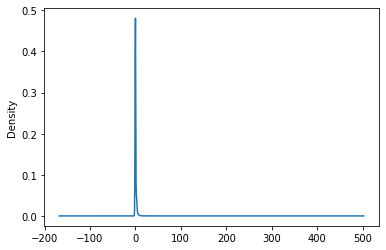

In [5]:
df_train['variable'].plot.kde()

<AxesSubplot:ylabel='Frequency'>

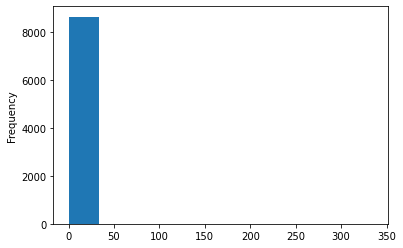

In [6]:
df_train['variable'].plot.hist()

In [7]:
df_test.describe()

,ID,variable
count,1441.000000,1441.000000
mean,9360.000000,3.770992
std,416.125181,13.953206
min,8640.000000,0.000000
25%,9000.000000,0.000000
50%,9360.000000,0.000000
75%,9720.000000,2.000000
max,10080.000000,208.000000


<AxesSubplot:ylabel='Density'>

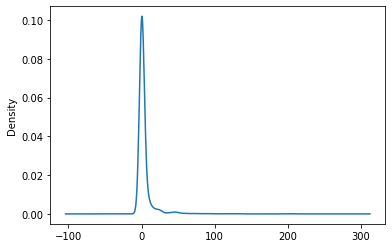

In [8]:
df_test['variable'].plot.kde()

<AxesSubplot:ylabel='Frequency'>

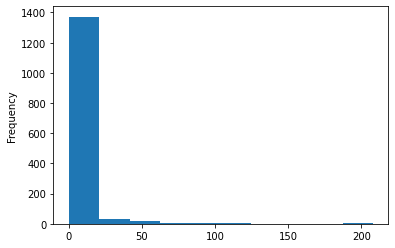

In [9]:
df_test['variable'].plot.hist()

In [10]:
def plot_anomalies(df, x='ID', y='variable'):
    """
    Scatter plot of values
    """

    categories = df['Predictions'].to_numpy()
    
    #Anomalies will be red
    colormap = np.array(['g', 'r'])

    f = plt.figure(figsize=(12, 4))
    f = plt.scatter(df[x], df[y], c=colormap[categories])
    f = plt.xlabel(x)
    f = plt.ylabel(y)
    f = plt.xticks(rotation=90)
    plt.show()


def find_anomalies(value, lower_threshold, upper_threshold):
    """
    Returns if value is anomaly or not
    """
 
    #Anomalies lie outside lower and upper threshold
    if value < lower_threshold or value > upper_threshold:
        return 1
    else: return 0

def iqr_anomaly_detector(data, column='variable', threshold=1.1):
    """
    Detects anomalies based on inter-quartile range
    """
    
    df = data.copy()
    quartiles = dict(data[column].quantile([.25, .50, .75]))
    quartile_3, quartile_1 = quartiles[0.75], quartiles[0.25]
    
    #Find Inter-quartile range
    iqr = quartile_3 - quartile_1

    lower_threshold = quartile_1 - (threshold * iqr)
    upper_threshold = quartile_3 + (threshold * iqr)

    print(f"quartile_1: {quartile_1}, \nquartile_3: {quartile_3}\n")
    print(f"Lower threshold: {lower_threshold}, \nUpper threshold: {upper_threshold}\n")
    
    df['Predictions'] = data[column].apply(find_anomalies, args=(lower_threshold, upper_threshold))
    
    return df

quartile_1: 0.0, 
quartile_3: 2.0

Lower threshold: -2.2, 
Upper threshold: 4.2



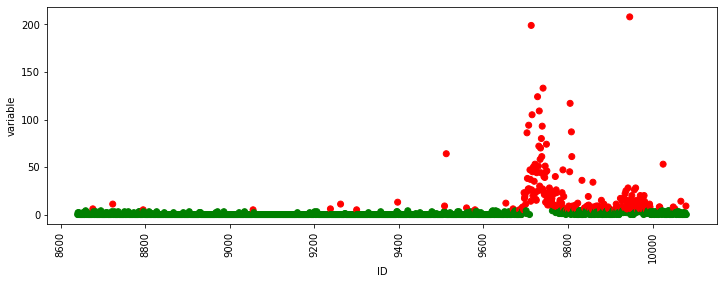

In [11]:
iqr_df = iqr_anomaly_detector(df_test)
plot_anomalies(iqr_df)